installing and importing packages - this way it should work both with colab and jupyter notebook in anaconda

In [5]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy 
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install geopandas
!{sys.executable} -m pip install osmnx 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import osmnx as ox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Getting the traffic accident data

*It's not that I am trying to sneak car accidents in the weater, it's just some data I had on hand:)*

In [6]:
#not sure if links are permanent, see https://daten.berlin.de/search/node/Stra%C3%9Fenverkehrsunf%C3%A4lle%20nach%20Unfallort
accidents_21 = pd.read_csv('https://download.statistik-berlin-brandenburg.de/c2b6d25afa19b607/8d9164595b8b/AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2021_Datensatz.csv',\
                          header=0, sep=';')

print(accidents_21.head())
print(accidents_21.dtypes)
accidents_21.shape

   OBJECTID  LAND  BEZ  LOR_ab_2021  UJAHR  UMONAT  USTUNDE  UWOCHENTAG  \
0    219249    11    3    3701658.0   2021      11       18           2   
1    219248    11    7    7501134.0   2021      12       19           7   
2    219247    11    4    4100101.0   2021      12       17           4   
3    219246    11    4    4501041.0   2021      12       15           7   
4    219243    11   11   11501339.0   2021      12        9           5   

   UKATEGORIE  UART  ...  IstPKW  IstFuss  IstKrad  IstGkfz  IstSonstige  \
0           3     0  ...       1        0        1        0            0   
1           3     6  ...       1        1        0        0            0   
2           3     5  ...       1        0        0        0            0   
3           3     5  ...       1        0        1        0            0   
4           3     3  ...       1        0        0        0            1   

   USTRZUSTAND      LINREFX      LINREFY    XGCSWGS84    YGCSWGS84  
0            1  800202,

(11267, 23)

<Axes: title={'center': 'Accidents per month'}, xlabel='Month', ylabel='Accidents'>

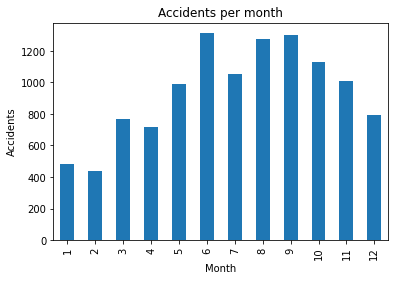

In [7]:
accidents_21.value_counts('UMONAT',sort=False).plot(kind='bar',title='Accidents per month', xlabel='Month',ylabel='Accidents')

Now I do something with geopandas, more for a sake of changing the notebook:)

In [ ]:
accidents_21.YGCSWGS84 = accidents_21.YGCSWGS84.str.replace(',','.').astype(float)
accidents_21.XGCSWGS84 = accidents_21.XGCSWGS84.str.replace(',','.').astype(float)
gdf = gpd.GeoDataFrame(accidents_21, geometry = gpd.points_from_xy(accidents_21.XGCSWGS84, accidents_21.YGCSWGS84))
print(gdf.head())

   OBJECTID  LAND  BEZ  LOR_ab_2021  UJAHR  UMONAT  USTUNDE  UWOCHENTAG  \
0    219249    11    3    3701658.0   2021      11       18           2   
1    219248    11    7    7501134.0   2021      12       19           7   
2    219247    11    4    4100101.0   2021      12       17           4   
3    219246    11    4    4501041.0   2021      12       15           7   
4    219243    11   11   11501339.0   2021      12        9           5   

   UKATEGORIE  UART  ...  IstFuss  IstKrad  IstGkfz  IstSonstige  USTRZUSTAND  \
0           3     0  ...        0        1        0            0            1   
1           3     6  ...        1        0        0            0            1   
2           3     5  ...        0        0        0            0            0   
3           3     5  ...        0        1        0            0            1   
4           3     3  ...        0        0        0            1            2   

       LINREFX      LINREFY  XGCSWGS84  YGCSWGS84             

<Axes: >

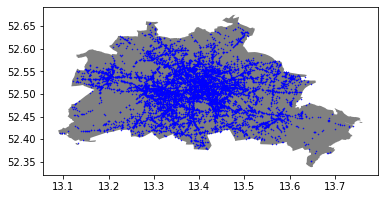

In [11]:
city = ox.geocode_to_gdf('Berlin, Germany')
print(city.head())
ax = ox.project_gdf(city).to_crs("EPSG:4326").plot(fc='gray')
gdf.plot(ax=ax,markersize = 1, color = 'blue',marker = '.')